<a href="https://colab.research.google.com/github/TomohiroYazaki/UW-Madison_GI_Tract_Image_Segmentation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from PIL import Image
from skimage import color
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train.csv')
df.head(10)

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
5,case123_day20_slice_0002,stomach,NaN
6,case123_day20_slice_0003,large_bowel,NaN
7,case123_day20_slice_0003,small_bowel,NaN
8,case123_day20_slice_0003,stomach,NaN
9,case123_day20_slice_0004,large_bowel,NaN


In [ ]:
df[~df["segmentation"].isna()]

,id,class,segmentation
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...
...,...,...,...
115459,case30_day0_slice_0135,small_bowel,22540 1 22804 5 23069 7 23334 10 23600 11 2386...
115461,case30_day0_slice_0136,large_bowel,18746 7 19009 23 19038 7 19273 44 19537 49 198...
115462,case30_day0_slice_0136,small_bowel,23079 1 23343 6 23608 9 23874 11 24139 13 2440...
115464,case30_day0_slice_0137,large_bowel,18746 2 19010 8 19040 3 19274 25 19302 12 1953...


In [ ]:
list_images = glob('/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train/*/*/scans/*.png')

In [ ]:
list_images[0]

'/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train/case22/case22_day0/scans/slice_0054_266_266_1.50_1.50.png'

In [ ]:
image_details = pd.DataFrame({'Path':list_images})
#splits = image_details['Path'].str.split("/", n = 11, expand = True)
splits = image_details['Path'].str.split("/", expand = True)
image_details['Case_no_And_Day'] = splits[9]
image_details['Slice_Info'] = splits[11]

image_details.head()

,Path,Case_no_And_Day,Slice_Info
0,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0054_266_266_1.50_1.50.png
1,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0132_266_266_1.50_1.50.png
2,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0069_266_266_1.50_1.50.png
3,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0134_266_266_1.50_1.50.png
4,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0012_266_266_1.50_1.50.png


In [ ]:
splits = image_details['Case_no_And_Day'].str.split("_", n = 2, expand = True)
image_details['Case_no'] = splits[0].str[4:].astype(int)
image_details['Day'] = splits[1].str[3:].astype(int)

image_details.head()

,Path,Case_no_And_Day,Slice_Info,Case_no,Day
0,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0054_266_266_1.50_1.50.png,22,0
1,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0132_266_266_1.50_1.50.png,22,0
2,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0069_266_266_1.50_1.50.png,22,0
3,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0134_266_266_1.50_1.50.png,22,0
4,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0012_266_266_1.50_1.50.png,22,0


In [ ]:
splits = image_details['Slice_Info'].str.split("_", n = 6, expand = True)
image_details['Slice_no'] = splits[1].astype(int)
image_details['Width'] = splits[2].astype(int)
image_details['Height'] = splits[3].astype(int)
image_details['Pixel1'] = splits[4].astype(float)
image_details['Pixel2'] = splits[5].str[:-4].astype(float)

image_details.head()

,Path,Case_no_And_Day,Slice_Info,Case_no,Day,Slice_no,Width,Height,Pixel1,Pixel2
0,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0054_266_266_1.50_1.50.png,22,0,54,266,266,1.5,1.5
1,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0132_266_266_1.50_1.50.png,22,0,132,266,266,1.5,1.5
2,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0069_266_266_1.50_1.50.png,22,0,69,266,266,1.5,1.5
3,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0134_266_266_1.50_1.50.png,22,0,134,266,266,1.5,1.5
4,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case22_day0,slice_0012_266_266_1.50_1.50.png,22,0,12,266,266,1.5,1.5


In [42]:
image_details[image_details["Width"]!=image_details["Height"]]

,Path,Case_no_And_Day,Slice_Info,Case_no,Day,Slice_no,Width,Height,Pixel1,Pixel2
288,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case47_day27,slice_0033_360_310_1.50_1.50.png,47,27,33,360,310,1.5,1.5
289,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case47_day27,slice_0032_360_310_1.50_1.50.png,47,27,32,360,310,1.5,1.5
290,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case47_day27,slice_0007_360_310_1.50_1.50.png,47,27,7,360,310,1.5,1.5
291,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case47_day27,slice_0022_360_310_1.50_1.50.png,47,27,22,360,310,1.5,1.5
292,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case47_day27,slice_0026_360_310_1.50_1.50.png,47,27,26,360,310,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...
34187,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case102_day0,slice_0042_360_310_1.50_1.50.png,102,0,42,360,310,1.5,1.5
34188,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case102_day0,slice_0116_360_310_1.50_1.50.png,102,0,116,360,310,1.5,1.5
34189,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case102_day0,slice_0047_360_310_1.50_1.50.png,102,0,47,360,310,1.5,1.5
34190,/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tr...,case102_day0,slice_0128_360_310_1.50_1.50.png,102,0,128,360,310,1.5,1.5


In [ ]:
image_details.shape

(38496, 10)

In [ ]:
image_details.to_csv("/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train_image_index.csv")

In [ ]:
#train_image_index = pd.read_csv('/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train_image_index.csv', index_col=0)
image_details = pd.read_csv('/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train_image_index.csv', index_col=0)

In [ ]:
for col in image_details.loc[:,'Case_no':'Height']:
  k = len(image_details[col].unique())
  print(f'{col} has {k} unique items.')
  print(np.sort(image_details[col].unique()))
  print()

Case_no has 85 unique items.
[  2   6   7   9  11  15  16  18  19  20  22  24  29  30  32  33  34  35
  36  40  41  42  43  44  47  49  53  54  55  58  63  65  66  67  74  77
  78  80  81  84  85  88  89  90  91  92 101 102 107 108 110 111 113 114
 115 116 117 118 119 121 122 123 124 125 129 130 131 133 134 135 136 138
 139 140 141 142 143 144 145 146 147 148 149 154 156]

Day has 35 unique items.
[ 0  1  2  3  4  5  6  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 32 34 35 36 38 39]

Slice_no has 144 unique items.
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 

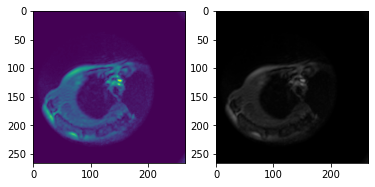

In [ ]:
img_path = "/content/drive/MyDrive/Kaggle/UW-Madison_GI_Tract_Image_Segmentation/Data/train/case101/case101_day20/scans/slice_0001_266_266_1.50_1.50.png"
img = cv2.imread(str(img_path),cv2.IMREAD_ANYDEPTH)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2,2)
ax2.imshow(imgRGB)
plt.show()

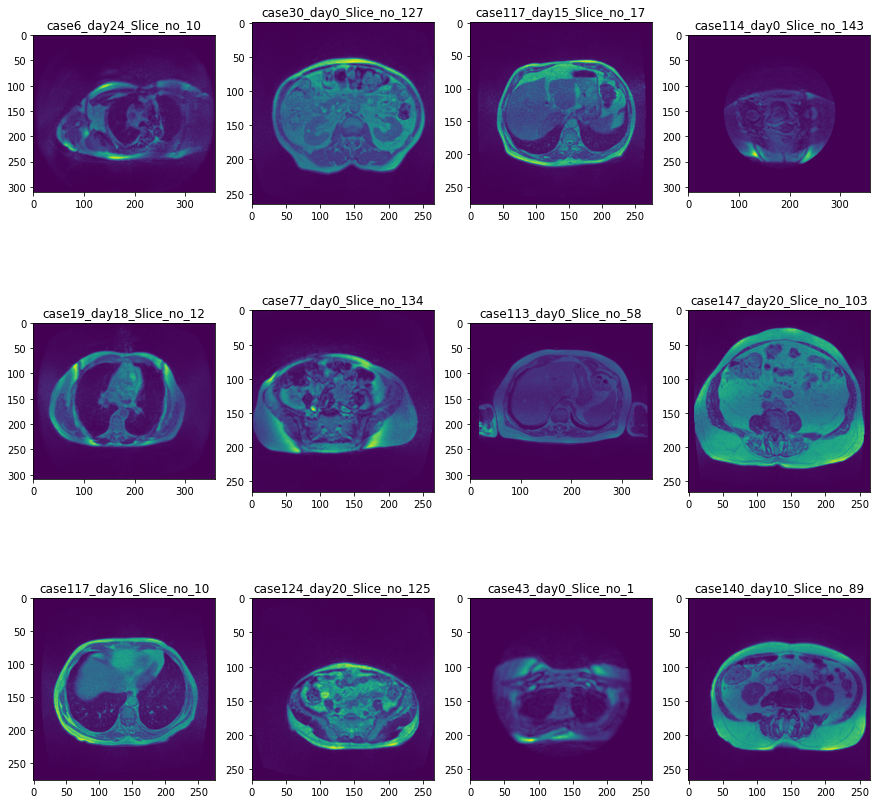

In [ ]:
plt.subplots(figsize=(15,15))
for i in range(12):
  index = np.random.randint(0,image_details.shape[0])
  image = Image.open(image_details.loc[index, 'Path'])
  image = np.array(image)

  plt.subplot(3,4, i + 1)

  title = (image_details.loc[index, 'Case_no_And_Day'] + 
           '_Slice_no_' + str(image_details.loc[index, 'Slice_no']))

  plt.title(title)
  plt.imshow(np.interp(image, [np.min(image), np.max(image)], [0,255]))
  # plt.imshow(image / image.max())  #This will also serve the purpose.
  
plt.show()

In [39]:
mask_data = df[df['segmentation'].notnull()]
mask_data.head()

,id,class,segmentation
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...


In [ ]:
index_list = list(mask_data.index)

In [65]:
index_list.index(288)

69

In [64]:
index_list[69]

288

In [67]:
index_list[69]
curr_id = mask_data.loc[index_list[0], 'id']
class_of_scan = mask_data.loc[index, 'class']
splits = curr_id.split('_')
#x = image_details[(image_details['Case_no']==int(splits[0][4:]))
#                &(image_details['Day']==int(splits[1][3:]))
#                &(image_details['Slice_no']==int(splits[3]))]
x = image_details[(image_details['Case_no']==47)
                &(image_details['Day']==27)
                &(image_details['Slice_no']==33)]

In [66]:
curr_id

'case123_day20_slice_0065'

In [71]:
image = np.array(Image.open(x['Path'].values[0]))
k = image.shape
rle_string = mask_data.loc[index, 'segmentation']

In [72]:
k

(310, 360)

In [73]:
rle_string

'41917 5 42275 8 42325 3 42635 8 42683 7 42994 10 43043 8 43354 10 43402 10 43714 10 43762 11 44074 10 44122 12 44434 11 44482 13 44795 10 44842 14 45156 9 45202 14 45518 7 45563 14 45924 13 46285 13 46646 12 47007 11 47367 11 47728 9 48088 9 48449 7 48811 4'

In [74]:
p_loc = get_pixel_loc(rle_string, k)

In [51]:
p_loc

[(155, 157),
 (156, 157),
 (157, 157),
 (158, 157),
 (159, 157),
 (247, 158),
 (248, 158),
 (249, 158),
 (250, 158),
 (251, 158),
 (252, 158),
 (253, 158),
 (254, 158),
 (31, 159),
 (32, 159),
 (33, 159),
 (75, 160),
 (76, 160),
 (77, 160),
 (78, 160),
 (79, 160),
 (80, 160),
 (81, 160),
 (82, 160),
 (123, 160),
 (124, 160),
 (125, 160),
 (126, 160),
 (127, 160),
 (128, 160),
 (129, 160),
 (168, 161),
 (169, 161),
 (170, 161),
 (171, 161),
 (172, 161),
 (173, 161),
 (174, 161),
 (175, 161),
 (176, 161),
 (177, 161),
 (217, 161),
 (218, 161),
 (219, 161),
 (220, 161),
 (221, 161),
 (222, 161),
 (223, 161),
 (224, 161),
 (262, 162),
 (263, 162),
 (264, 162),
 (265, 162),
 (0, 163),
 (1, 163),
 (2, 163),
 (3, 163),
 (4, 163),
 (5, 163),
 (44, 163),
 (45, 163),
 (46, 163),
 (47, 163),
 (48, 163),
 (49, 163),
 (50, 163),
 (51, 163),
 (52, 163),
 (53, 163),
 (90, 164),
 (91, 164),
 (92, 164),
 (93, 164),
 (94, 164),
 (95, 164),
 (96, 164),
 (97, 164),
 (98, 164),
 (99, 164),
 (138, 164),
 (1

In [ ]:
apply_mask(image, p_loc, k)

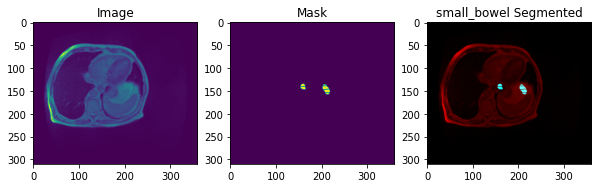

In [83]:
fig, ax = plt.subplots(1,3, figsize=(10,10))

ax[0].set_title('Image')
ax[0].imshow(image)

ax[1].set_title('Mask')
ax[1].imshow(get_mask(p_loc, k))

ax[2].set_title(f'{class_of_scan} Segmented')
ax[2].imshow(apply_mask(image, p_loc, k))
plt.show()

In [79]:
def get_pixel_loc(rle_string, img_shape):
  rle = [int(i) for i in rle_string.split(' ')]
  pairs = list(zip(rle[0::2],rle[1::2]))

  # This for loop will help to understand better the above command.
  # pairs = []
  # for i in range(0, len(rle), 2):
  #   a.append((rle[i], rle[i+1])

  p_loc = []     #   Pixel Locations

  for start, length in pairs:
    for p_pos in range(start, start + length):
      p_loc.append((p_pos % img_shape[1], p_pos // img_shape[0]))
      #p_loc.append((p_pos % img_shape[1], p_pos // img_shape[1]))
      #p_pos // img_shape[1] ??
  
  return p_loc

In [80]:
def get_mask(mask, img_shape):
  
  canvas = np.zeros(img_shape).T
  canvas[tuple(zip(*mask))] = 1

  # This is the Equivalent for loop of the above command for better understanding.
  # for pos in range(len(p_loc)):
  #   canvas[pos[0], pos[1]] = 1

  return canvas.T

In [81]:
def apply_mask(image, mask, img_shape):
  
  image = image / image.max()
  image = np.dstack((image, get_mask(mask, img_shape), get_mask(mask, img_shape)))

  return image

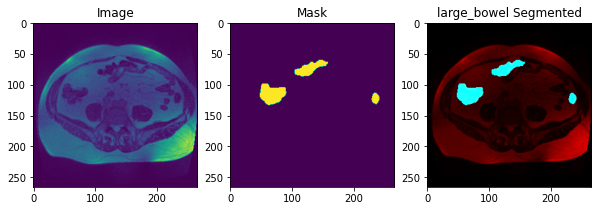

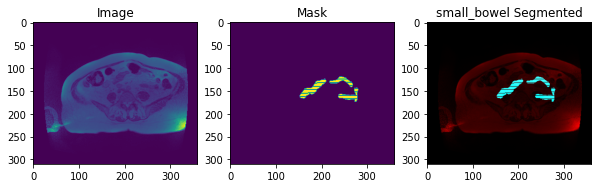

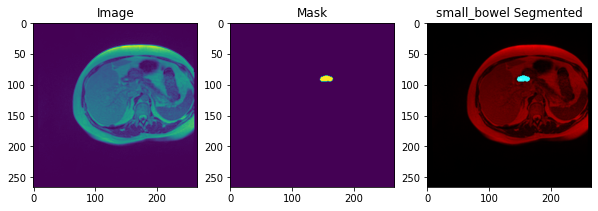

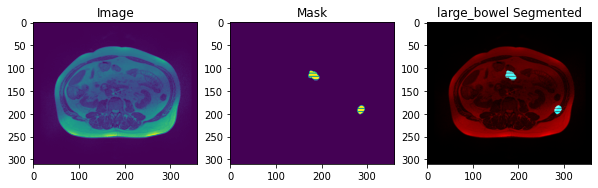

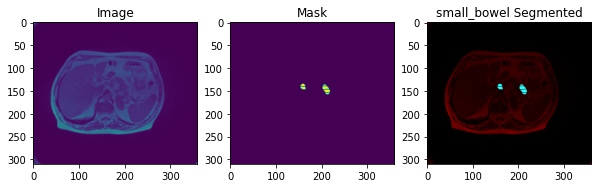

In [ ]:
for i in range(5):
  index = index_list[np.random.randint(0,len(index_list) - 1)]

  curr_id = mask_data.loc[index, 'id']
  class_of_scan = mask_data.loc[index, 'class']

  splits = curr_id.split('_')
  x = image_details[(image_details['Case_no']==int(splits[0][4:]))
                  &(image_details['Day']==int(splits[1][3:]))
                  &(image_details['Slice_no']==int(splits[3]))]
  
  image = np.array(Image.open(x['Path'].values[0]))
  k = image.shape

  rle_string = mask_data.loc[index, 'segmentation']
  p_loc = get_pixel_loc(rle_string, k)


  fig, ax = plt.subplots(1,3, figsize=(10,10))
  ax[0].set_title('Image')
  ax[0].imshow(image)

  ax[1].set_title('Mask')
  ax[1].imshow(get_mask(p_loc, k))

  ax[2].set_title(f'{class_of_scan} Segmented')
  ax[2].imshow(apply_mask(image, p_loc, k))
  plt.show()
  
plt.show()